# Линейная регрессия (1D)

### Сгенерируйте синтетический набор точек вида y = ax+b+noise. Решите задачу линейной регрессии для множества точек (x, y). Поиск параметров произведите с помощью градиентного спуска. Результат — параметры линейной регрессии.

In [3]:
import numpy as np
from numpy import log, dot, e
from numpy.random import rand, multivariate_normal, shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
class LinearReg():
    
    def __init__(self, learning_rate=0.001, max_iter=10000):
        self.a = 0
        self.b = 0
        self.lr = learning_rate
        self.epochs = max_iter
    
    def fit(self, X, Y):
        n = float(len(X))
        for i in range(self.epochs): 
            Y_pred = self.a*X + self.b
            self.a = self.a - self.lr * (-2/n) * sum(X * (Y - Y_pred))
            self.b = self.b - self.lr * (-2/n) * sum(Y - Y_pred)
    
    def get_coef(self):
        return self.a, self.b
    
    def predict(self, X):
        return self.a * X + self.b

In [5]:
X = np.array(range(50))
Y = 2 * X + 5 + np.random.randn(len(X))
print('X:',X)
print('Y:',Y)
lr = LinearReg()

lr.fit(X,Y)
lr.get_coef()

X: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Y: [  5.47812811   7.32774323   8.82266988  10.10879595  13.82655418
  15.31713558  15.96986818  18.83963727  22.18187466  22.37221369
  23.61931882  27.35000053  28.00592084  29.43153172  32.64124458
  34.93529139  38.66655729  39.12549243  41.42219996  44.34381488
  44.38813428  46.67884964  49.57171782  51.1191915   51.30368904
  56.00896121  57.85979296  59.08966844  63.01238944  63.86066384
  66.67443655  67.31162645  69.14221676  71.33120337  74.81267129
  73.30524277  76.54730697  79.67306123  82.17461465  81.89827195
  86.95840805  85.54683251  89.06351289  90.59866421  95.1645131
  96.49347418  96.39434735  99.36205308 101.57484946 101.83859751]


(2.010877559300099, 4.8971321047192085)

# Логистическая регрессия (2D)

### Сгенерируйте два синтетических набора точек на плоскости, добавьте им метки классов (2 класса). Визуализируйте множества (matplotlib). Разделите данные на тренировочный и тестовый набор. Реализуйте логистическую регрессию. Проверьте точность полученного алгоритма с помощью метрики accuracy (на тестовом множестве).

In [6]:
class LogisticReg:
    
    def __init__(self, lr=0.01, max_iter=1000):
        self.lr = lr
        self.epochs = max_iter
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + e**(-z))
    
    def cost_function(self, X, Y, weights):                 
        z = dot(X, weights)
        predict_1 = Y * log(self.sigmoid(z))
        predict_0 = (1 - Y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, Y):
        X = np.c_[X, np.ones(X.shape[0])]    
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(self.epochs):        
            Y_pred = self.sigmoid(dot(X, weights))
            weights -= self.lr * dot(X.T,  Y_pred - Y) / N
            
        self.weights = weights
    
    def predict(self, X):
        X = np.c_[X, np.ones(X.shape[0])] 
        z = dot(X, self.weights)
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]
    
    def predict_proba(self, X):
        X = np.c_[X, np.ones(X.shape[0])] 
        z = dot(X, self.weights)
        return np.array((self.sigmoid(z),1-self.sigmoid(z))).T

In [7]:
def generate_dataset():
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 100]]
    
    mean2 = [10, 10]
    cov2 = [[10, 0], [0, 30]]
    
    class1 = multivariate_normal(mean1, cov1, 1000)
    class2 = multivariate_normal(mean2, cov2, 1000)
    
    X = np.concatenate((class1, class2), axis=0)
    Y = np.concatenate((np.array([0] * 1000), np.array([1]*1000)))
    return X,Y
    
def train_test_split(X, Y, test_fraction=0.3):
    indices = np.random.permutation(X.shape[0])
    train_size = int(X.shape[0] * (1 - test_fraction))
    training_idx, test_idx = indices[:train_size], indices[train_size:]
    return X[training_idx,:], X[test_idx,:], Y[training_idx], Y[test_idx]

### split data

<AxesSubplot:>

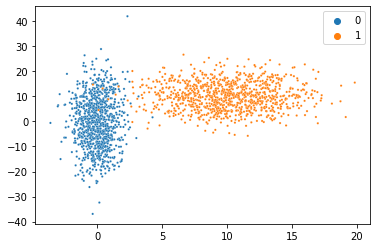

In [8]:
X,Y = generate_dataset()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
sns.scatterplot(x=X[:,0], y=X[:,1], s=5, hue=Y)

### sigmoid

In [9]:
log_reg = LogisticReg()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)
print('Accuracy: ',np.mean(Y_pred==Y_test))

Accuracy:  0.99


[(-5.0, 20.0), (-30.0, 40.0)]

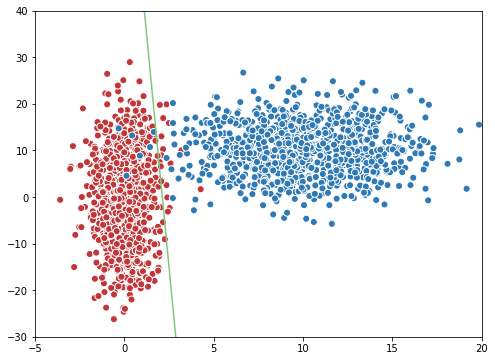

In [10]:
xx, yy = np.mgrid[-50:50:.1, -50:50:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Accent", vmin=0, vmax=10000)

ax.scatter(X[100:,0], X[100:, 1], c=Y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(xlim=(-5, 20), ylim=(-30, 40))

# Дерево принятия решений (2D)

### Рассмотрите те же данные, что и в задании 2. Разделите точки на классы с помощью алгоритма CART(gini criterion). Ограничьте глубину дерева (по вашему выбору). Проверьте точность полученного алгоритма с помощью метрики accuracy на тестовом наборе.

In [11]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTreeClassifier:
    def __init__(self, max_depth=4):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [12]:
cart = DecisionTreeClassifier(max_depth = 5)
cart.fit(X_train, Y_train)
Y_pred = cart.predict(X_test)
#cart.print_tree()
print('Accuracy: ',np.mean(Y_pred==Y_test))

Accuracy:  0.9933333333333333
